<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(2)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_2'

In [4]:
os.listdir(base_path)

['data_multi_delta_2_n20.csv',
 'data_multi_delta_2_n30.csv',
 'data_multi_delta_2_n60.csv',
 'data_multi_delta_2_n120.csv',
 'data_multi_delta_2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,85.327653,65.086910,-68.449419,91.965144,136.021336,-44.056192
1,0.0,1.0,95.560129,74.652997,113.244903,293.458029,154.884962,138.573067
2,0.0,2.0,42.684649,27.144008,-19.096872,60.731785,59.275541,1.456244
3,0.0,3.0,72.772734,51.829445,55.769203,190.371382,111.400489,78.970893
4,0.0,4.0,36.825017,30.172211,-30.491913,46.505315,56.731067,-10.225752
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,81.043876,26.827304,-12.763986,105.107193,131.486920,-26.379727
29996,999.0,26.0,56.450079,91.892280,8.193981,166.536339,160.981260,5.555079
29997,999.0,27.0,94.398848,94.201313,-24.311599,174.288562,199.606186,-25.317624
29998,999.0,28.0,34.801899,64.760095,-19.154543,90.407451,117.800029,-27.392578


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,85.327653,65.086910,-68.449419,91.965144,136.021336,-44.056192
1,0.0,1.0,95.560129,74.652997,113.244903,293.458029,154.884962,138.573067
2,0.0,2.0,42.684649,27.144008,-19.096872,60.731785,59.275541,1.456244
3,0.0,3.0,72.772734,51.829445,55.769203,190.371382,111.400489,78.970893
4,0.0,4.0,36.825017,30.172211,-30.491913,46.505315,56.731067,-10.225752
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,81.043876,26.827304,-12.763986,105.107193,131.486920,-26.379727
29996,999.0,26.0,56.450079,91.892280,8.193981,166.536339,160.981260,5.555079
29997,999.0,27.0,94.398848,94.201313,-24.311599,174.288562,199.606186,-25.317624
29998,999.0,28.0,34.801899,64.760095,-19.154543,90.407451,117.800029,-27.392578


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    85.327653  65.086910  -68.449419   91.965144  136.021336   
      1.0    95.560129  74.652997  113.244903  293.458029  154.884962   
      2.0    42.684649  27.144008  -19.096872   60.731785   59.275541   
      3.0    72.772734  51.829445   55.769203  190.371382  111.400489   
      4.0    36.825017  30.172211  -30.491913   46.505315   56.731067   
...                ...        ...         ...         ...         ...   
999.0 25.0   81.043876  26.827304  -12.763986  105.107193  131.486920   
      26.0   56.450079  91.892280    8.193981  166.536339  160.981260   
      27.0   94.398848  94.201313  -24.311599  174.288562  199.606186   
      28.0   34.801899  64.760095  -19.154543   90.407451  117.800029   
      29.0   24.262144  80.789611  100.662914  215.714669  120.729023   

                  e_hat  
rep   index              
0.0   0.0    -44.056192  
      1.0    138.573067  
      2.0      1.456244  
      3.0     78.970893  
      4.0    -10.225752  
...                 ...  
999.0 25.0   -26.379727  
      26.0     5.555079  
      27.0   -25.317624  
      28.0   -27.392578  
      29.0    94.985646  

[30000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    85.327653  65.086910  -68.449419   91.965144  136.021336   
      1.0    95.560129  74.652997  113.244903  293.458029  154.884962   
      2.0    42.684649  27.144008  -19.096872   60.731785   59.275541   
      3.0    72.772734  51.829445   55.769203  190.371382  111.400489   
      4.0    36.825017  30.172211  -30.491913   46.505315   56.731067   
...                ...        ...         ...         ...         ...   
999.0 25.0   81.043876  26.827304  -12.763986  105.107193  131.486920   
      26.0   56.450079  91.892280    8.193981  166.536339  160.981260   
      27.0   94.398848  94.201313  -24.311599  174.288562  199.606186   
      28.0   34.801899  64.760095  -19.154543   90.407451  117.800029   
      29.0   24.262144  80.789611  100.662914  215.714669  120.729023   

                  e_hat  
rep   index              
0.0   0.0    -44.056192  
      1.0    138.573067  
      2.0      1.456244  
      3.0     78.970893  
      4.0    -10.225752  
...                 ...  
999.0 25.0   -26.379727  
      26.0     5.555079  
      27.0   -25.317624  
      28.0   -27.392578  
      29.0    94.985646  

[30000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,85.327653,65.086910,-68.449419,91.965144,136.021336,-44.056192
1,0.0,1.0,95.560129,74.652997,113.244903,293.458029,154.884962,138.573067
2,0.0,2.0,42.684649,27.144008,-19.096872,60.731785,59.275541,1.456244
3,0.0,3.0,72.772734,51.829445,55.769203,190.371382,111.400489,78.970893
4,0.0,4.0,36.825017,30.172211,-30.491913,46.505315,56.731067,-10.225752
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,81.043876,26.827304,-12.763986,105.107193,131.486920,-26.379727
29996,999.0,26.0,56.450079,91.892280,8.193981,166.536339,160.981260,5.555079
29997,999.0,27.0,94.398848,94.201313,-24.311599,174.288562,199.606186,-25.317624
29998,999.0,28.0,34.801899,64.760095,-19.154543,90.407451,117.800029,-27.392578


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    85.327653  65.086910  -68.449419   91.965144  136.021336   
      1.0    95.560129  74.652997  113.244903  293.458029  154.884962   
      2.0    42.684649  27.144008  -19.096872   60.731785   59.275541   
      3.0    72.772734  51.829445   55.769203  190.371382  111.400489   
      4.0    36.825017  30.172211  -30.491913   46.505315   56.731067   
...                ...        ...         ...         ...         ...   
999.0 25.0   81.043876  26.827304  -12.763986  105.107193  131.486920   
      26.0   56.450079  91.892280    8.193981  166.536339  160.981260   
      27.0   94.398848  94.201313  -24.311599  174.288562  199.606186   
      28.0   34.801899  64.760095  -19.154543   90.407451  117.800029   
      29.0   24.262144  80.789611  100.662914  215.714669  120.729023   

                  e_hat  
rep   index              
0.0   0.0    -44.056192  
      1.0    138.573067  
      2.0      1.456244  
      3.0     78.970893  
      4.0    -10.225752  
...                 ...  
999.0 25.0   -26.379727  
      26.0     5.555079  
      27.0   -25.317624  
      28.0   -27.392578  
      29.0    94.985646  

[30000 rows x 6 columns]

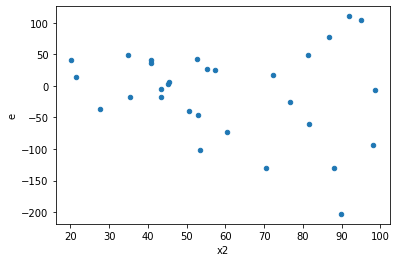

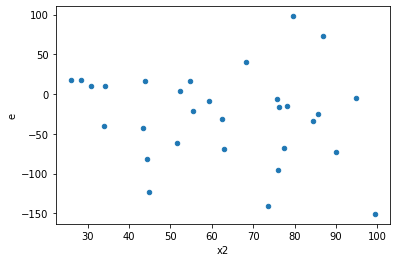

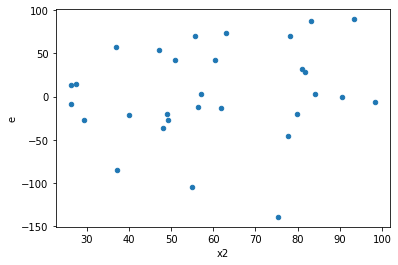

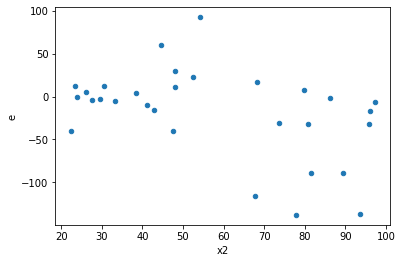

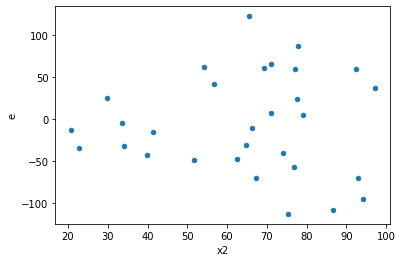

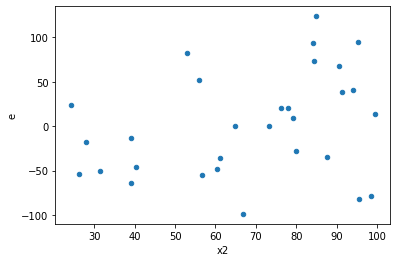

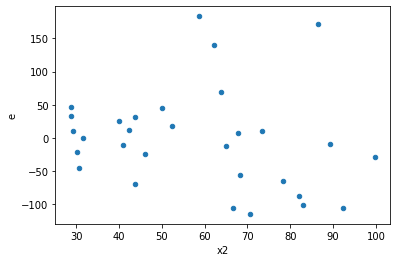

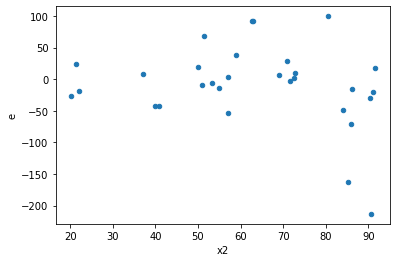

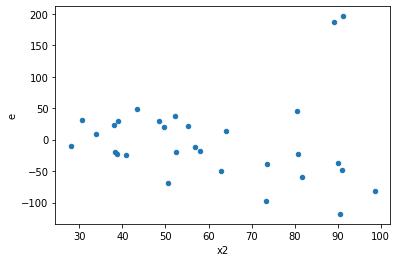

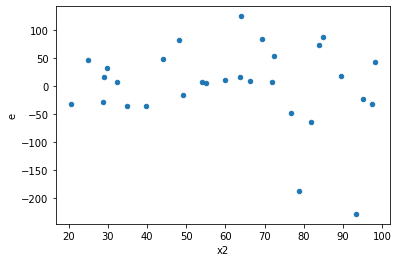

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,10.0,10.0,2601.2343013152645,66015.15762899171,260.12343013152645,6601.515762899171,25.378397322998705,1.7356911144128517e-05,0.9999913215444279,8.678455572064259e-06,Reject005=0 : Heteroscedasticity
1.0,10.0,10.0,3420.2750586825427,108809.10701962208,342.02750586825425,10880.910701962208,31.81296976200923,5.977719217842292e-06,0.9999970111403911,2.988859608921146e-06,Reject005=0 : Heteroscedasticity
3.0,10.0,10.0,18890.191342984308,36079.62682867525,1889.0191342984308,3607.9626828675255,1.9099661921675022,0.32235605183350735,0.8388219740832463,0.16117802591675368,Reject005=1 : Homoscedasticity
4.0,10.0,10.0,15619.409020225161,53469.979225420786,1561.9409020225162,5346.997922542078,3.42330360618535,0.06518741117458582,0.9674062944127071,0.03259370558729291,Reject005=1 : Homoscedasticity
5.0,10.0,10.0,15652.638006709547,171220.01031066733,1565.2638006709547,17122.001031066735,10.93873187620345,0.0007786397969851144,0.9996106801015074,0.0003893198984925572,Reject005=0 : Heteroscedasticity
6.0,10.0,10.0,9566.948320903648,22122.2055313573,956.6948320903648,2212.22055313573,2.312357586694661,0.2023063424518674,0.8988468287740663,0.1011531712259337,Reject005=1 : Homoscedasticity
7.0,10.0,10.0,13734.164504666382,54569.95430666296,1373.4164504666383,5456.995430666297,3.9732998893468934,0.04005668357610759,0.9799716582119462,0.020028341788053794,Reject005=0 : Heteroscedasticity
8.0,10.0,10.0,7891.5140121788545,34877.48166165452,789.1514012178855,3487.748166165452,4.419618543137429,0.02779957756022622,0.9861002112198869,0.01389978878011311,Reject005=0 : Heteroscedasticity
9.0,10.0,10.0,4542.14262449319,102075.09070577053,454.214262449319,10207.509070577053,22.472894214139746,3.0610760579197205e-05,0.9999846946197104,1.5305380289598602e-05,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,10.0,2601.2343013152645,66015.15762899171,260.12343013152645,6601.515762899171,25.378397322998705,1.7356911144128517e-05,Reject005=0 : Heteroscedasticity
1.0,10.0,10.0,3420.2750586825427,108809.10701962208,342.02750586825425,10880.910701962208,31.81296976200923,5.977719217842292e-06,Reject005=0 : Heteroscedasticity
2.0,10.0,10.0,71671.68328334631,51442.53582980866,7167.168328334631,5144.253582980866,0.7177525833520069,0.60984536844652,Reject005=1 : Homoscedasticity
3.0,10.0,10.0,18890.191342984308,36079.62682867525,1889.0191342984308,3607.9626828675255,1.9099661921675022,0.32235605183350735,Reject005=1 : Homoscedasticity
4.0,10.0,10.0,15619.409020225161,53469.979225420786,1561.9409020225162,5346.997922542078,3.42330360618535,0.06518741117458582,Reject005=1 : Homoscedasticity
5.0,10.0,10.0,15652.638006709547,171220.01031066733,1565.2638006709547,17122.001031066735,10.93873187620345,0.0007786397969851144,Reject005=0 : Heteroscedasticity
6.0,10.0,10.0,9566.948320903648,22122.2055313573,956.6948320903648,2212.22055313573,2.312357586694661,0.2023063424518674,Reject005=1 : Homoscedasticity
7.0,10.0,10.0,13734.164504666382,54569.95430666296,1373.4164504666383,5456.995430666297,3.9732998893468934,0.04005668357610759,Reject005=0 : Heteroscedasticity
8.0,10.0,10.0,7891.5140121788545,34877.48166165452,789.1514012178855,3487.748166165452,4.419618543137429,0.02779957756022622,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      601
Reject005=0 : Heteroscedasticity    399
Name: Result_test, dtype: int64